# Task 1 (Data Cleaning)



In [94]:
!pip install pandas numpy seaborn matplotlib

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
!gdown --id 1XydurvmbbxLsFdG0-LT7l-Se6ukMY-ZA -O dataset.csv

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1XydurvmbbxLsFdG0-LT7l-Se6ukMY-ZA
To: /content/dataset.csv
100% 602k/602k [00:00<00:00, 9.52MB/s]


Read CSV file

In [97]:
df = pd.read_csv('dataset.csv')

In [98]:
df.head(20)

,Soil_pH,Rainfall,Temperature,Humidity,Fertilizer_Usage,Crop_Yield,Water_Availability,Soil_Type,Crop_Type,Region,Farming_Method,Irrigation_Type
0,24.647514,4314.019520,129.833483,251.042899,247.916175,5435.744189,2763.928282,Silty,Cotton,Central,Organic,Flood
1,8.302857,1630.321426,34.054905,34.801954,50.148572,1944.104023,494.192414,Peaty,Rice,Central,NaN,Sprinkler
2,7.427976,1544.305767,13.351397,44.539789,262.518557,4280.064157,102.921551,Silty,Cotton,NaN,Organic,Flood
3,6.894634,392.409819,42.290034,76.420761,63.182167,2138.584740,922.584643,Loamy,Sugarcane,North,Organic,Flood
4,5.124075,383.573993,29.896527,61.721151,NaN,5713.301966,NaN,NaN,Sugarcane,Central,Permaculture,Drip
5,23.204694,1905.813752,60.718201,223.281162,360.573130,3661.609654,2253.653052,Silty,Sugarcane,North,NaN,NaN
6,4.732334,NaN,36.478850,55.725085,262.699128,3918.074781,632.977767,Clayey,Soybean,East,NaN,Rain-fed
7,7.964705,876.065605,19.007791,82.188742,77.511934,1712.501978,477.783695,Peaty,NaN,South,Organic,Flood
8,6.904460,1391.424712,34.272844,56.937326,284.921787,3360.021403,355.785668,NaN,Sugarcane,Central,Permaculture,Rain-fed
9,7.332290,207.692821,11.389892,88.754897,220.980256,2931.663031,123.452853,Silty,Barley,South,Organic,Sprinkler


In [99]:
missing_values = df.isnull().sum()
print(missing_values)

Soil_pH               394
Rainfall              421
Temperature           415
Humidity              391
Fertilizer_Usage      392
Crop_Yield            396
Water_Availability    399
Soil_Type             402
Crop_Type             381
Region                392
Farming_Method        416
Irrigation_Type       410
dtype: int64


## Identify columns with missing values and calculate the percentage.

In [100]:
print("Missing Values Percentage:\n")
missing_values = df.isnull().sum() / len(df) * 100
display(missing_values[missing_values > 0])

Missing Values Percentage:



,0
Soil_pH,9.850
Rainfall,10.525
Temperature,10.375
Humidity,9.775
Fertilizer_Usage,9.800
Crop_Yield,9.900
Water_Availability,9.975
Soil_Type,10.050
Crop_Type,9.525
Region,9.800


## visualizations of missing data before cleaning

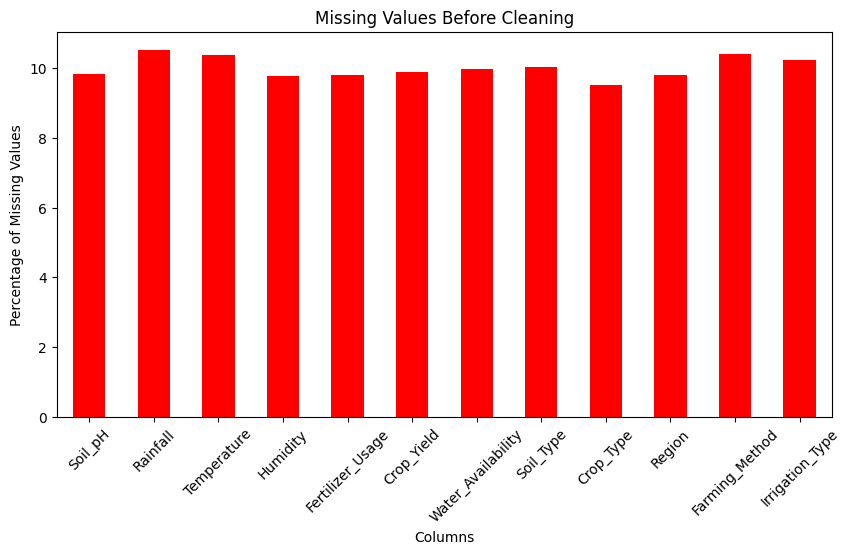

In [101]:
plt.figure(figsize=(10,5))
missing_values[missing_values > 0].plot(kind='bar', color='red')
plt.title("Missing Values Before Cleaning")
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Values")
plt.xticks(rotation=45)
plt.show()

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Soil_pH             3606 non-null   float64
 1   Rainfall            3579 non-null   float64
 2   Temperature         3585 non-null   float64
 3   Humidity            3609 non-null   float64
 4   Fertilizer_Usage    3608 non-null   float64
 5   Crop_Yield          3604 non-null   float64
 6   Water_Availability  3601 non-null   float64
 7   Soil_Type           3598 non-null   object 
 8   Crop_Type           3619 non-null   object 
 9   Region              3608 non-null   object 
 10  Farming_Method      3584 non-null   object 
 11  Irrigation_Type     3590 non-null   object 
dtypes: float64(7), object(5)
memory usage: 375.1+ KB


## Replace missing values

In [103]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-103-37a73c868839>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-103-37a73c868839>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [104]:
missing_values = df.isnull().sum()
print(missing_values)

Soil_pH               0
Rainfall              0
Temperature           0
Humidity              0
Fertilizer_Usage      0
Crop_Yield            0
Water_Availability    0
Soil_Type             0
Crop_Type             0
Region                0
Farming_Method        0
Irrigation_Type       0
dtype: int64


In [105]:
plt.figure(figsize=(10,5))
missing_values_after = df.isnull().sum() / len(df) * 100
display(missing_values)

,0
Soil_pH,0
Rainfall,0
Temperature,0
Humidity,0
Fertilizer_Usage,0
Crop_Yield,0
Water_Availability,0
Soil_Type,0
Crop_Type,0
Region,0


<Figure size 1000x500 with 0 Axes>

In [106]:
plt.figure(figsize=(10,5))
missing_values_after_cleaning = df.isnull().sum()
missing_values_to_plot = missing_values_after_cleaning[missing_values_after_cleaning > 0]

if not missing_values_to_plot.empty:
    missing_values_to_plot.plot(kind='bar', color='red')
    plt.title("Missing Values After Cleaning")
    plt.xlabel("Columns")
    plt.ylabel("Number of Missing Values")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No missing values found after cleaning.")

No missing values found after cleaning.


<Figure size 1000x500 with 0 Axes>

# Task 2 (Feature Engineering)

In [107]:
from sklearn.preprocessing import  MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [108]:
numerical_cols = ['Soil_pH', 'Rainfall', 'Temperature', 'Humidity', 'Fertilizer_Usage', 'Crop_Yield', 'Water_Availability']
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [109]:
categorical_cols = ['Soil Type', 'Crop Type', 'Region', 'Farming Method', 'Irrigation Type']
categorical_cols = [col.strip() for col in categorical_cols]
categorical_cols = [col.replace(' ', '_') for col in categorical_cols]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Task -3 (Outlier Detection)

## box plots to visually identify outliers

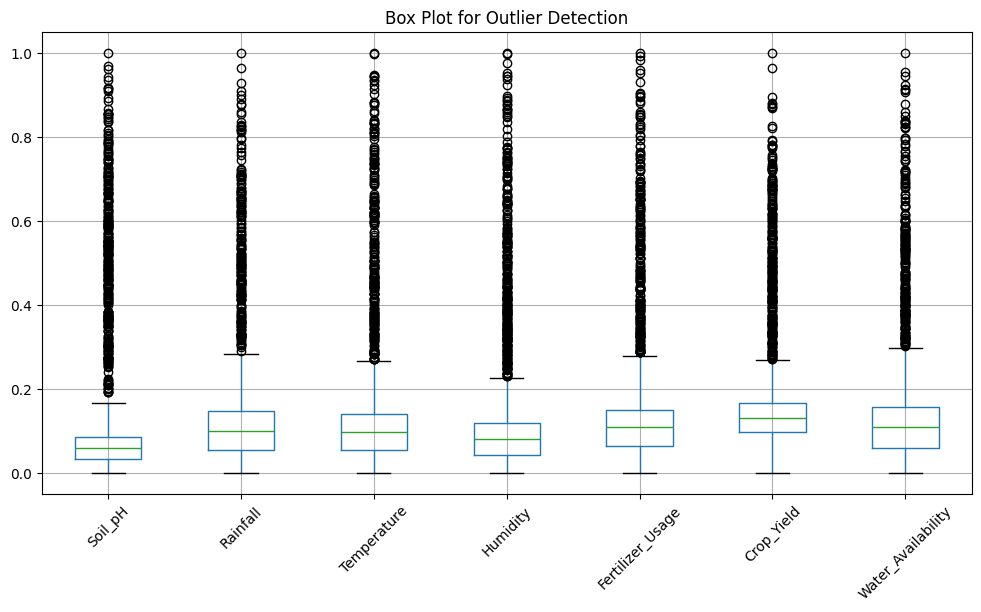

In [110]:
plt.figure(figsize=(12, 6))
df[numerical_cols].boxplot()
plt.title("Box Plot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

## Apply z-score and IQR methods to detect extreme values

In [111]:
z_scores = np.abs(stats.zscore(df[numerical_cols]))
outlier_indices_z = np.where(z_scores > 3)
print("Outlier Indices (Z-Score Method):", outlier_indices_z)

Outlier Indices (Z-Score Method): (array([   0,    0,    0,    0,   20,   26,   26,   32,   38,   38,   38,
         42,   50,   50,   51,   58,   88,   88,   96,   96,  115,  115,
        115,  126,  126,  152,  152,  152,  162,  162,  162,  162,  181,
        191,  191,  191,  201,  201,  203,  203,  203,  203,  229,  229,
        229,  236,  236,  236,  236,  250,  272,  272,  272,  272,  272,
        283,  289,  289,  289,  301,  301,  301,  307,  307,  307,  307,
        318,  322,  324,  324,  324,  324,  328,  328,  328,  331,  331,
        331,  364,  364,  367,  367,  374,  374,  374,  384,  384,  384,
        384,  384,  390,  403,  403,  403,  406,  419,  421,  421,  421,
        427,  427,  427,  433,  433,  450,  450,  450,  450,  451,  469,
        469,  469,  471,  471,  471,  493,  493,  495,  495,  499,  499,
        499,  499,  508,  508,  524,  524,  524,  529,  529,  529,  529,
        545,  545,  545,  545,  556,  556,  556,  563,  563,  573,  573,
        573,  57

In [112]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outlier_indices_iqr = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR)))
print("Outlier Indices (IQR Method):", df[outlier_indices_iqr.any(axis=1)].index.tolist())

Outlier Indices (IQR Method): [0, 5, 20, 26, 32, 38, 42, 50, 51, 58, 66, 88, 96, 115, 126, 151, 152, 162, 181, 191, 201, 203, 229, 236, 250, 272, 283, 289, 301, 307, 318, 322, 324, 328, 331, 364, 367, 374, 384, 390, 403, 406, 419, 421, 427, 433, 435, 450, 451, 469, 471, 493, 495, 499, 508, 524, 529, 545, 556, 563, 573, 575, 597, 631, 638, 644, 651, 653, 663, 665, 676, 689, 702, 713, 715, 723, 725, 729, 772, 777, 797, 804, 810, 825, 833, 840, 860, 861, 867, 882, 883, 886, 887, 902, 914, 921, 927, 928, 951, 984, 985, 986, 987, 1007, 1017, 1028, 1033, 1048, 1054, 1090, 1093, 1100, 1108, 1133, 1135, 1137, 1149, 1160, 1168, 1174, 1185, 1188, 1204, 1213, 1234, 1242, 1243, 1248, 1254, 1258, 1261, 1264, 1272, 1286, 1301, 1306, 1321, 1336, 1367, 1412, 1414, 1425, 1442, 1481, 1482, 1485, 1491, 1511, 1512, 1529, 1533, 1534, 1552, 1565, 1572, 1593, 1597, 1603, 1604, 1608, 1609, 1613, 1618, 1635, 1650, 1658, 1673, 1675, 1686, 1687, 1691, 1697, 1707, 1741, 1744, 1754, 1755, 1799, 1805, 1817, 1821, 1

## # Handling outliers by capping extreme values

In [113]:
for col in numerical_cols:
    upper_limit = Q3[col] + 1.5 * IQR[col]
    lower_limit = Q1[col] - 1.5 * IQR[col]
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])

# Task -4 (Plotting Results)

## Histograms for numerical feature distributions

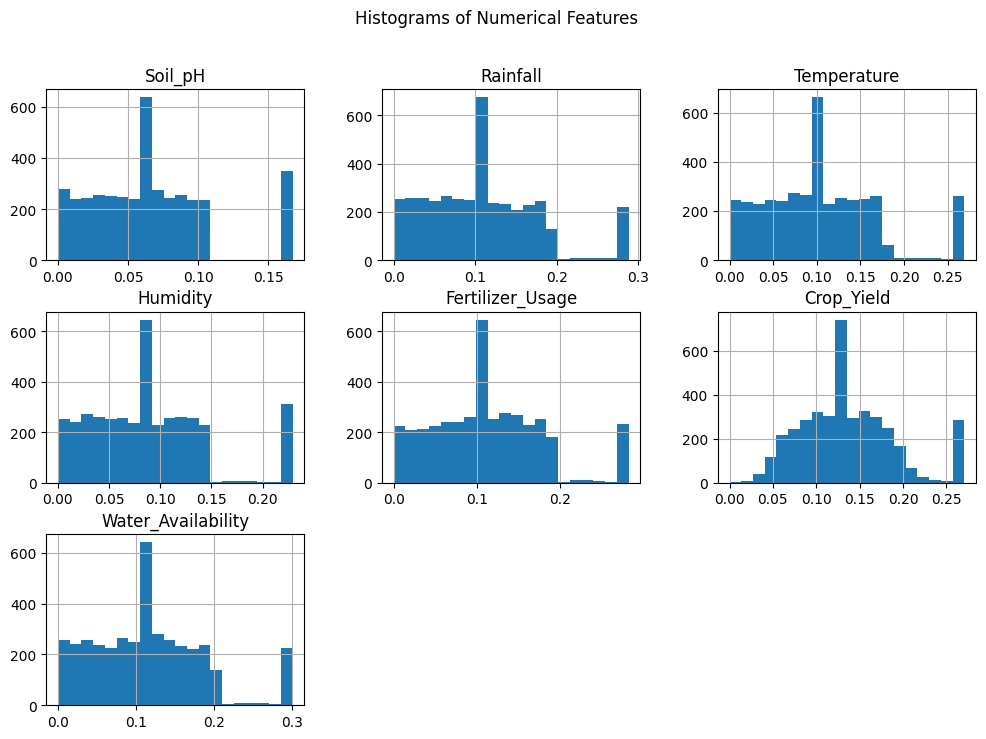

In [114]:
df[numerical_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()

In [115]:
categorical_cols = ['Soil Type', 'Crop Type', 'Region', 'Farming Method', 'Irrigation Type']

## Box plots after outlier treatment

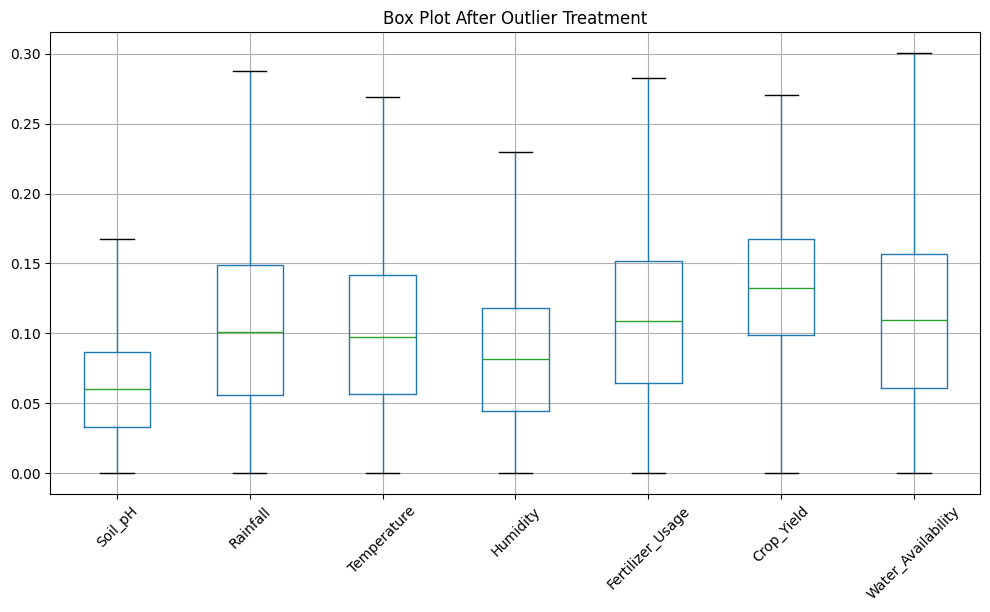

In [116]:
plt.figure(figsize=(12, 6))
df[numerical_cols].boxplot()
plt.title("Box Plot After Outlier Treatment")
plt.xticks(rotation=45)
plt.show()

## Bar Charts for Categorical Features

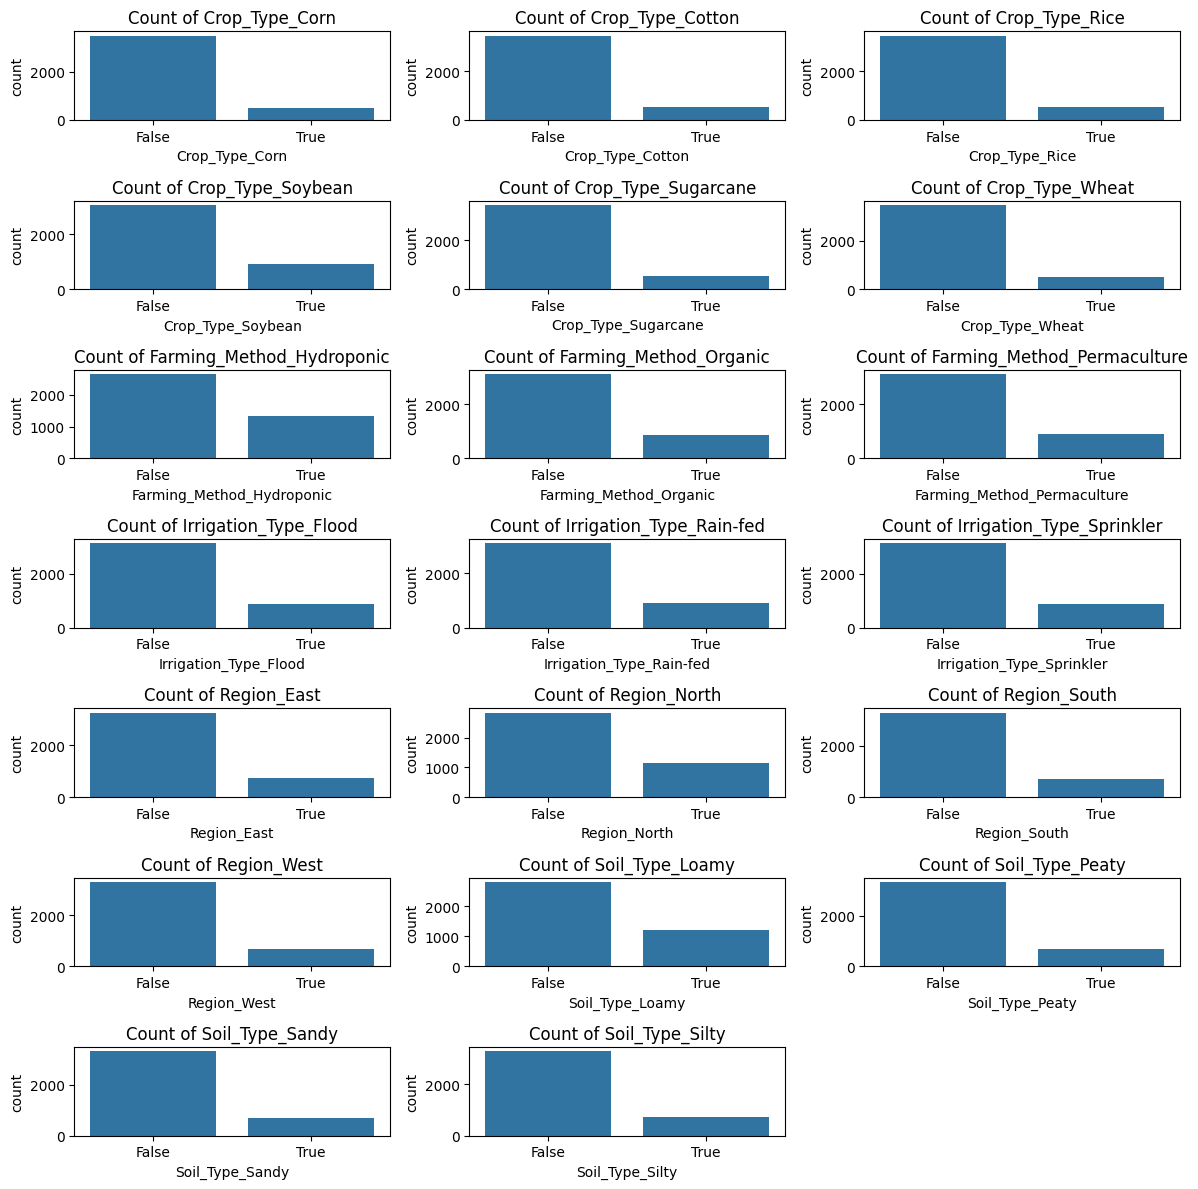

In [117]:
plt.figure(figsize=(12, 12))
num_cols = df_no_outliers.columns.difference(numerical_cols)
num_categorical_cols = len([col for col in num_cols if df_no_outliers[col].nunique() < 10])
num_rows = (num_categorical_cols + 2) // 3

for i, col in enumerate(num_cols, 1):
    if df_no_outliers[col].nunique() < 10:
        plt.subplot(num_rows, 3, i)
        sns.countplot(x=df_no_outliers[col])
        plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()